# PREDICTION DIABETE

![crack](https://res.cloudinary.com/practicaldev/image/fetch/s--CzHhVr2E--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/w8y1pf9mdhafhmimlk6s.jpeg)

## ⭐ INFORMATIONS
---

#### 🔗 Lien vers le Dataset

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

#### 📜 À propos de l'ensemble de données

L' ensemble de données de prédiction du diabète est une collection de données médicales et démographiques sur les patients, ainsi que leur statut diabétique (positif ou négatif). Les données comprennent des caractéristiques telles que l’âge, le sexe, l’indice de masse corporelle (IMC), l’hypertension, les maladies cardiaques, les antécédents de tabagisme, le taux d’HbA1c et la glycémie. Cet ensemble de données peut être utilisé pour créer des modèles d’apprentissage automatique afin de prédire le diabète chez les patients en fonction de leurs antécédents médicaux et de leurs informations démographiques. Cela peut être utile aux professionnels de la santé pour identifier les patients susceptibles de présenter un risque de développer un diabète et pour élaborer des plans de traitement personnalisés. De plus, l'ensemble de données peut être utilisé par les chercheurs pour explorer les relations entre divers facteurs médicaux et démographiques et la probabilité de développer un diabète.

## 📦 LIBRAIRIES
---


### 🗂 Import des librairies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

## 📥 IMPORT
---


### 💾 Import du Dataset

In [5]:
# Importation du Dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

## 🔍 OVERVIEW
---

#### 📂Informations sur le Dataset

In [6]:
# Visualisation des données du Dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# Desciption des valeurs statistiques du Dataset
df.describe(include="all")  

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [8]:
# Informations des types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# visualisation des valeurs manquantes
df.isnull().any()           

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [10]:
# visualisation des valeurs manquantes - bis
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## 🔦 EDA
---

### 🧐 EDA - Exploration des données

#### 📋 Informations sur les données du Dataset

##### 👫 gender

Le genre fait référence au sexe biologique de l'individu, qui peut avoir un impact sur sa susceptibilité au diabète. Il existe trois catégories : hommes, femmes et autres.

In [11]:
# Répartition par genre
df.value_counts('gender')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

##### 🧓 age

L'âge est un facteur important car le diabète est plus fréquemment diagnostiqué chez les personnes âgées. L'âge varie de 0 à 80 ans dans notre ensemble de données.

In [12]:
# Répartition par âge
df.value_counts('age')

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

##### 💥hypertension


L'hypertension est une condition médicale dans laquelle la pression artérielle dans les artères est constamment élevée. Il a des valeurs 0 ou 1 où 0 indique qu'ils ne souffrent pas d'hypertension et pour 1 cela signifie qu'ils souffrent d'hypertension.

In [13]:
# Répartition par hypertension
df.value_counts('hypertension')

hypertension
0    92515
1     7485
Name: count, dtype: int64

##### ❤️‍🩹 heart_disease


Les maladies cardiaques sont une autre condition médicale associée à un risque accru de développer un diabète. Il a des valeurs de 0 ou 1, où 0 indique qu'ils n'ont pas de maladie cardiaque et pour 1, cela signifie qu'ils ont une maladie cardiaque.

In [14]:
# Répartition par heart_disease
df.value_counts('heart_disease')

heart_disease
0    96058
1     3942
Name: count, dtype: int64

##### 🚬 smoking_history

Les antécédents de tabagisme sont également considérés comme un facteur de risque de diabète et peuvent exacerber les complications associées au diabète. Dans notre ensemble de données, nous avons 5 catégories, à savoir pas actuel, ancien, aucune information, actuel, jamais et jamais.

In [15]:
# Répartition par smoking_history
df.value_counts('smoking_history')

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

##### 🧑 bmi

L'IMC (indice de masse corporelle) est une mesure de la graisse corporelle basée sur le poids et la taille. Des valeurs d’IMC plus élevées sont liées à un risque plus élevé de diabète. La plage de l'IMC dans l'ensemble de données va de 10,16 à 71,55. Un IMC inférieur à 18,5 correspond à une insuffisance pondérale, 18,5 à 24,9 correspond à un poids normal, 25 à 29,9 correspond à un surpoids et 30 ou plus correspond à l'obésité.

In [16]:
# Répartition par bmi
df.value_counts('bmi')

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
51.09        1
13.88        1
13.77        1
13.64        1
95.69        1
Name: count, Length: 4247, dtype: int64

##### 🧁 HbA1c_level

Le taux d'HbA1c (hémoglobine A1c) est une mesure du taux de sucre dans le sang moyen d'une personne au cours des 2-3 derniers mois. Des niveaux plus élevés indiquent un risque plus élevé de développer un diabète. Généralement, plus de 6,5 % du taux d'HbA1c indique un diabète.

In [17]:
# Répartition par HbA1c_level
df.value_counts('HbA1c_level')

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

##### 🍯 blood_glucose_level


La glycémie fait référence à la quantité de glucose présente dans le sang à un moment donné. Une glycémie élevée est un indicateur clé du diabète.

In [18]:
# Répartition par blood_glucose_level
df.value_counts('blood_glucose_level')

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

##### ☠ diabetes


Le diabète est la variable cible à prédire, les valeurs 1 indiquant la présence de diabète et 0 indiquant l'absence de diabète

In [19]:
# Répartition par diabetes
df.value_counts('diabetes')

diabetes
0    91500
1     8500
Name: count, dtype: int64

### 📊 Visualisation des données

##### 🗄 Visualisation par Catégories

In [20]:
# Moyenne par catégories pour le diabetes
df.groupby('diabetes').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


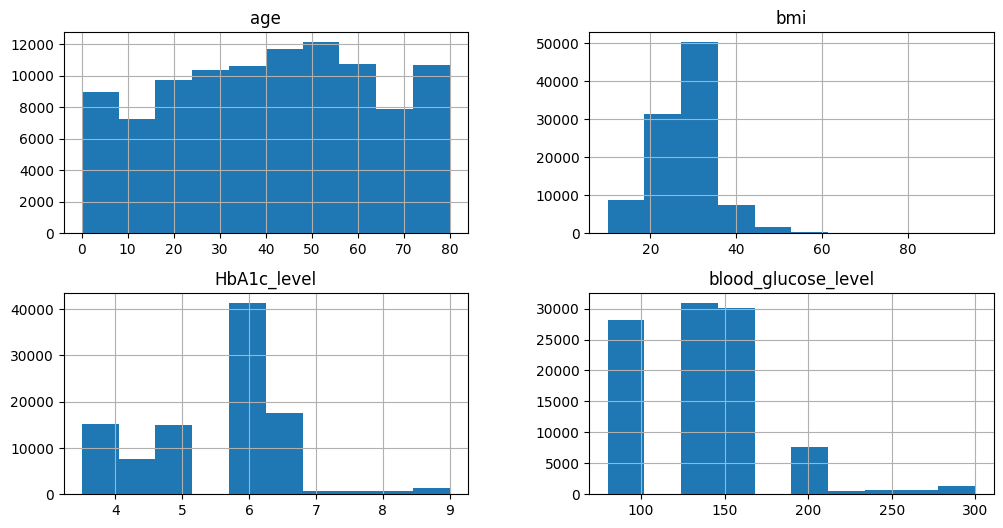

In [21]:
# Visualisation par catégories pour les valeurs =! de 0/1
df[['age','bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(12,6))
plt.show()

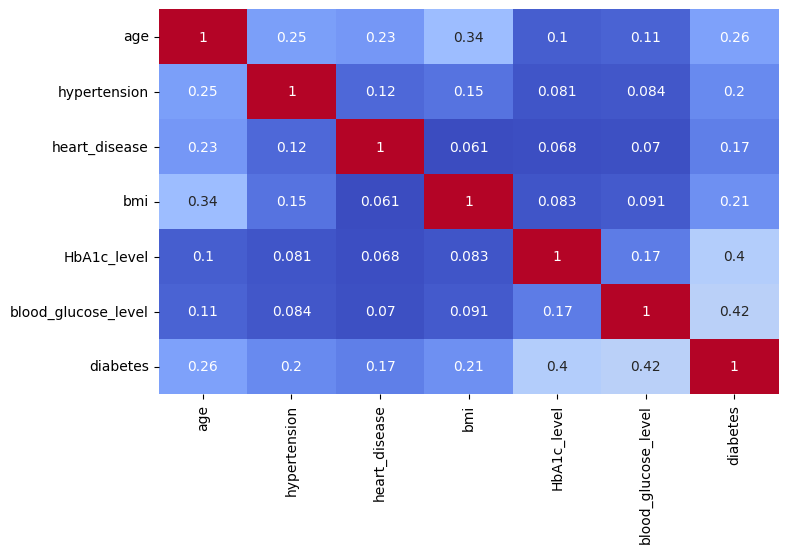

In [22]:
# Matrice de correlation
num_cols = [col for col in df.columns if df[col].dtype != 'O']
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(),cmap='coolwarm',annot=True,cbar=False)
plt.show()

##### 👫 Visualisation par genre

`Info générale`

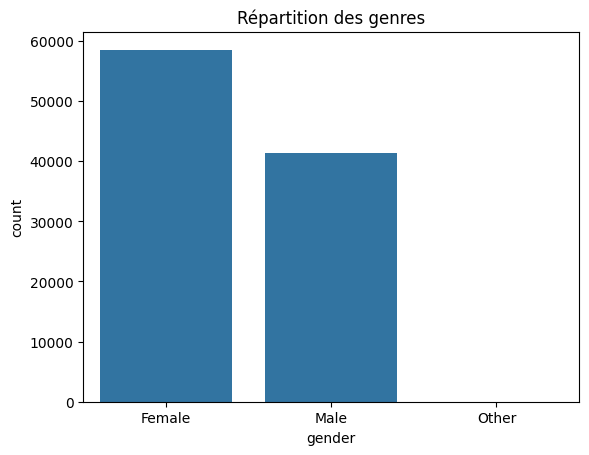

In [23]:
# Répartition des genres
sns.countplot(x='gender', data=df)
plt.title('Répartition des genres')
plt.show()

`Info en lien avec le diabete`

In [24]:
# Nombre de valeurs pour "gender" par rapport à "gender"
pd.crosstab(df.diabetes, df.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


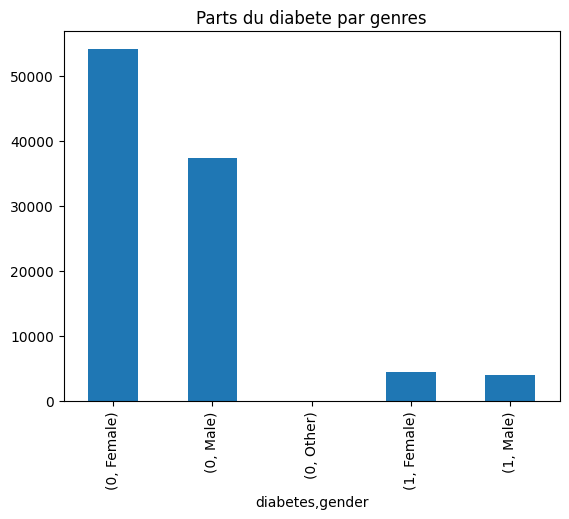

In [25]:
# Exposition au diabetes par genre
df.groupby('diabetes')['gender'].value_counts().plot(kind='bar')
plt.title('Parts du diabete par genres')
plt.show()

In [26]:
# Moyenne par catégories par genre
df.groupby('gender').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


##### 🧓 Visualisation par Age

`Info générale`

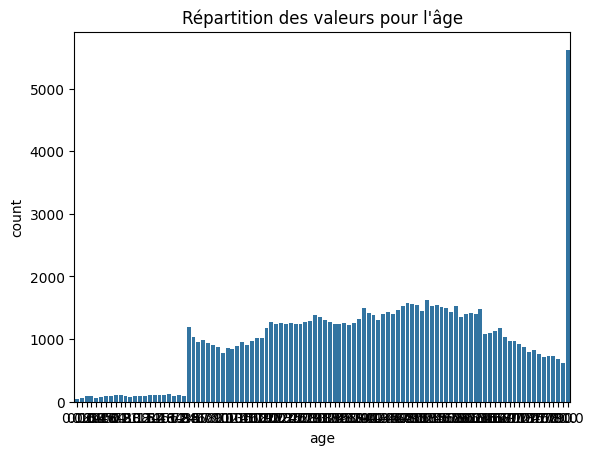

In [27]:
# Répartition des valeurs pour l'âge
sns.countplot(x='age', data=df)
plt.title("Répartition des valeurs pour l'âge")
plt.show()

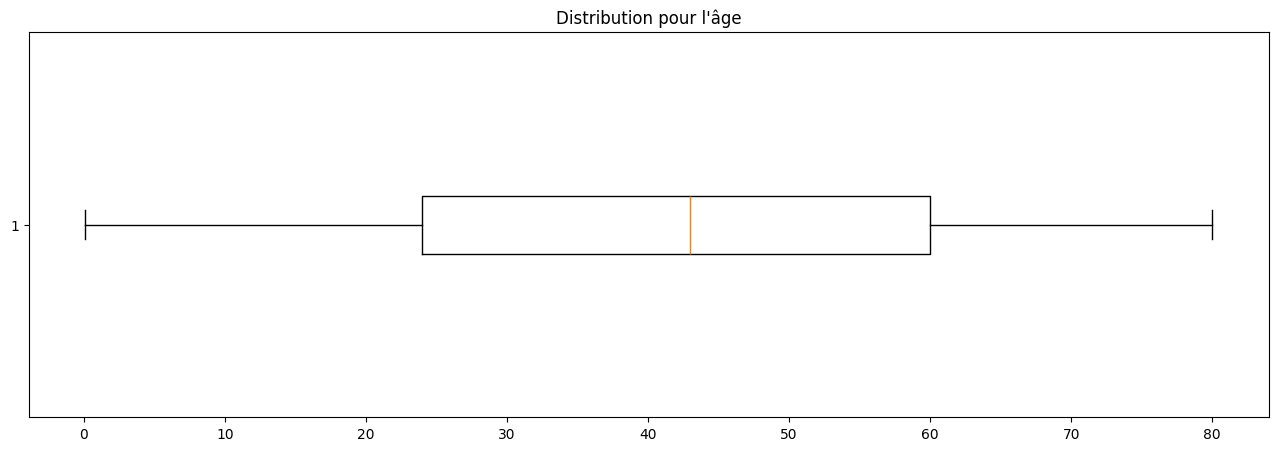

In [28]:
# Distribution des valeurs pour l'âge
plt.figure(figsize=(16,5))
plt.boxplot(df['age'],vert=False)
plt.title("Distribution pour l'âge")
plt.show()

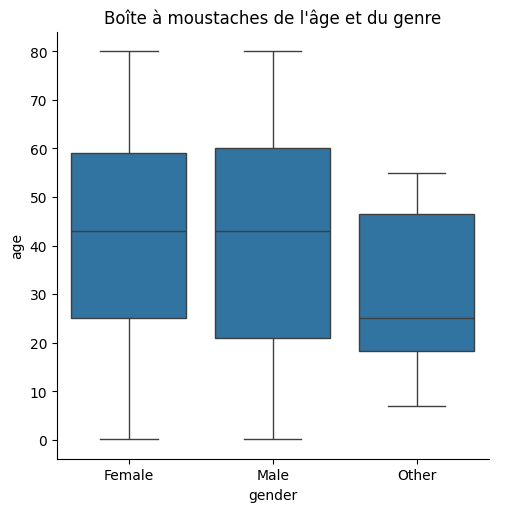

In [29]:
# Analyse des âges en fonction du genre
sns.catplot(x="gender", y="age", data=df, kind="box")
plt.title('Boîte à moustaches de l\'âge et du genre')
plt.show()

`Info en lien avec le diabete`

In [30]:
# Nombre de valeurs pour "diabetes" par rapport à "age"
pd.crosstab(df.diabetes, df.age)

age,0.08,0.16,0.24,0.32,0.40,0.48,0.56,0.64,0.72,0.80,...,71.00,72.00,73.00,74.00,75.00,76.00,77.00,78.00,79.00,80.00
diabetes,,,,,,,,,,,,,,,,,,,,,
0,36,59,87,89,66,83,96,99,104,102,...,679,616,641,580,549,584,594,546,480,4597
1,0,0,0,0,0,0,0,0,0,0,...,192,174,182,184,172,149,136,136,141,1024


Le vieillissement est un facteur du diabète
Pour mieux visualiser nos données, nous allons ségmenter se FEATURE


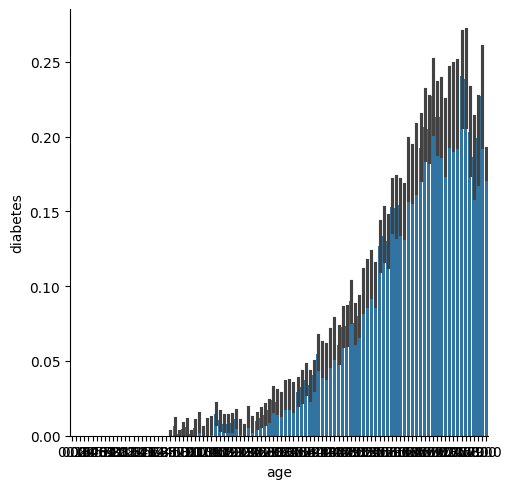

In [31]:
# Visualisation par Gender / Diabetes
sns.catplot(x="age", y="diabetes",data=df, kind="bar")
print("Le vieillissement est un facteur du diabète")
print("Pour mieux visualiser nos données, nous allons ségmenter se FEATURE")

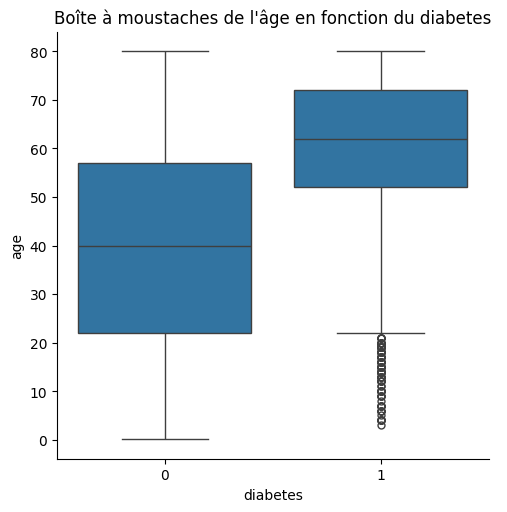

In [32]:
# Analyse des âges
sns.catplot(x="diabetes", y="age", data=df, kind="box")
plt.title('Boîte à moustaches de l\'âge en fonction du diabetes')
plt.show()

##### 💥Visualisation sur l'hypertension

`Info générale`

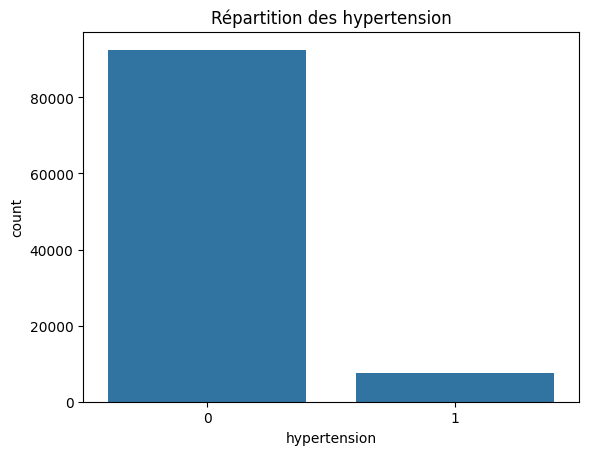

In [33]:
# Répartition des hypertension
sns.countplot(x='hypertension', data=df)
plt.title('Répartition des hypertension')
plt.show()

`Info en lien avec le diabete`

In [34]:
# Nombre de valeurs pour "diabetes" par rapport à "hypertension"
pd.crosstab(df.diabetes, df.hypertension)

hypertension,0,1
diabetes,,
0,86103,5397
1,6412,2088


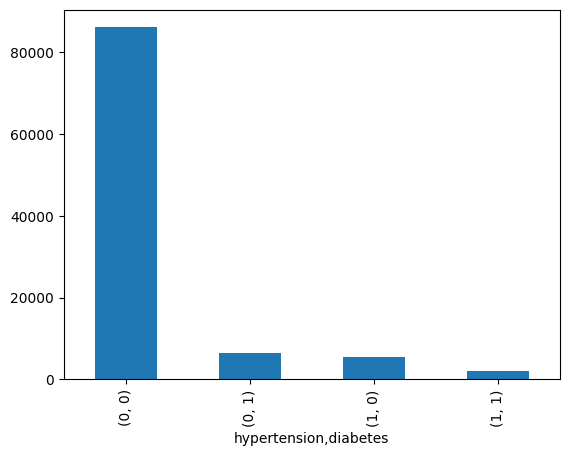

In [35]:
df.groupby('hypertension')['diabetes'].value_counts().plot(kind='bar')
plt.show()

##### ❤️‍🩹 Visualisation par Heart Disease

`Info générale`

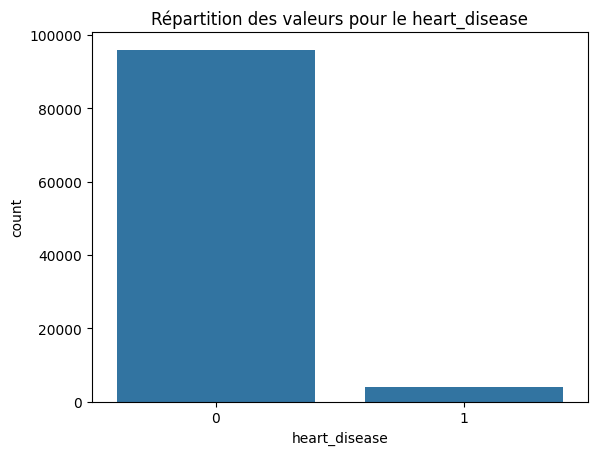

In [36]:
# Répartition des valeurs pour le heart_disease 
sns.countplot(x='heart_disease', data=df)
plt.title('Répartition des valeurs pour le heart_disease')
plt.show()

`Info en lien avec le diabete`

In [37]:
# Nombre de valeurs pour "diabetes" par rapport à "heart_disease"
pd.crosstab(df.diabetes, df.heart_disease)

heart_disease,0,1
diabetes,,
0,88825,2675
1,7233,1267


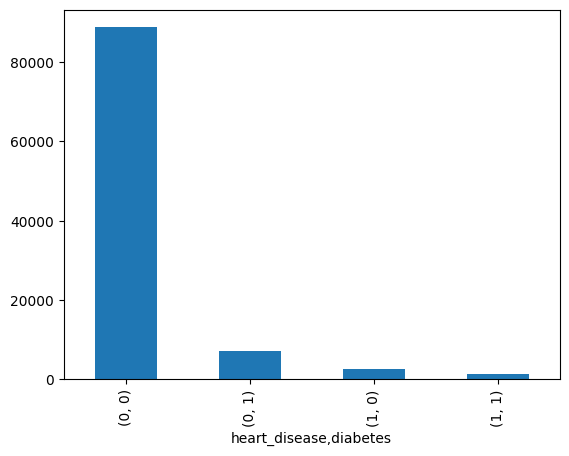

In [38]:
df.groupby('heart_disease')['diabetes'].value_counts().plot(kind='bar')
plt.show()

##### 🚬 Visualisation par Smoking History

`Info générale`

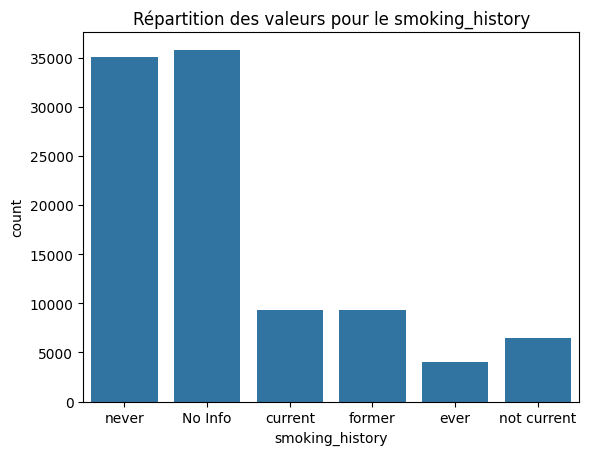

In [39]:
# Répartition des valeurs pour le smoking_history 
sns.countplot(x='smoking_history', data=df)
plt.title('Répartition des valeurs pour le smoking_history')
plt.show()

`Info en lien avec le diabete`

In [40]:
# Nombre de valeurs pour "gender" par rapport à "smoking_history"
pd.crosstab(df.diabetes, df.smoking_history)

smoking_history,No Info,current,ever,former,never,not current
diabetes,,,,,,
0,34362,8338,3532,7762,31749,5757
1,1454,948,472,1590,3346,690


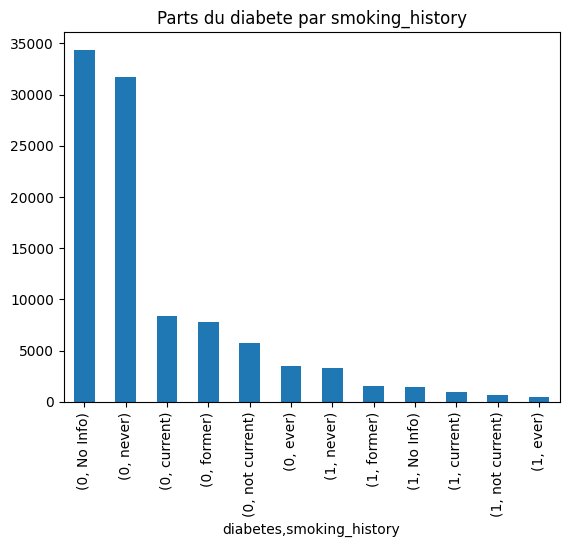

In [41]:
# Exposition au diabetes par smoking_history
df.groupby('diabetes')['smoking_history'].value_counts().plot(kind='bar')
plt.title('Parts du diabete par smoking_history')
plt.show()

##### 🧑 Visualisation par BMI

`Info générale`

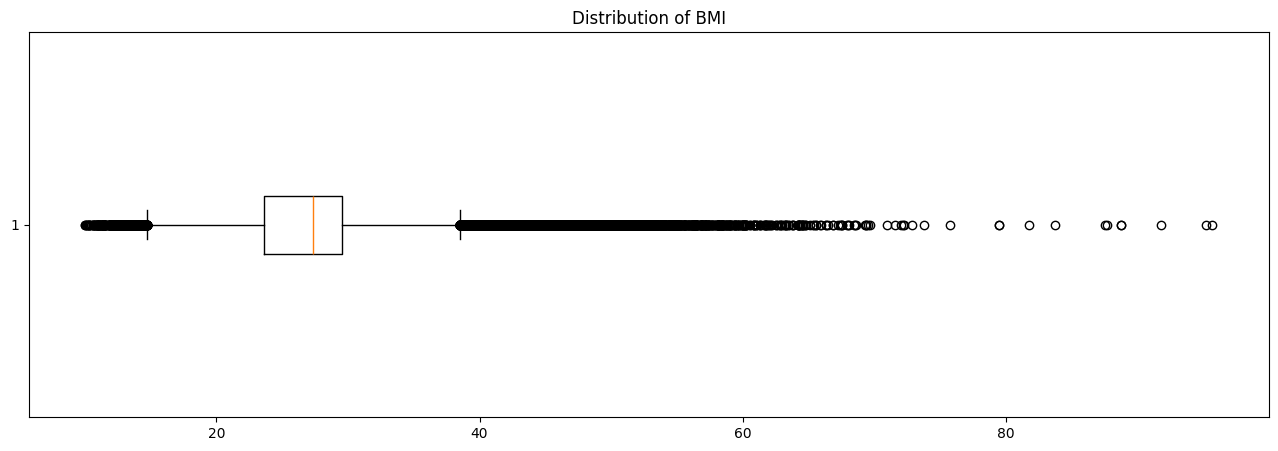

In [42]:
# Répartition des valeurs pour le bmi (visible en boxplot)
plt.figure(figsize=(16,5))
plt.boxplot(df['bmi'],vert=False)
plt.title("Distribution of BMI")
plt.show()

In [43]:
# Box Plot Vertical
#plt.boxplot(df['bmi'])
#plt.show()

`Info en lien avec le diabete`

In [44]:
# Nombre de valeurs pour "diabetes" par rapport à "bmi"
pd.crosstab(df.diabetes, df.bmi)

bmi,10.01,10.08,10.14,10.19,10.21,10.30,10.34,10.40,10.50,10.59,...,79.48,81.73,83.74,87.51,87.70,88.72,88.76,91.82,95.22,95.69
diabetes,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,1,1,2,1,1,1,1,...,1,0,0,1,1,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


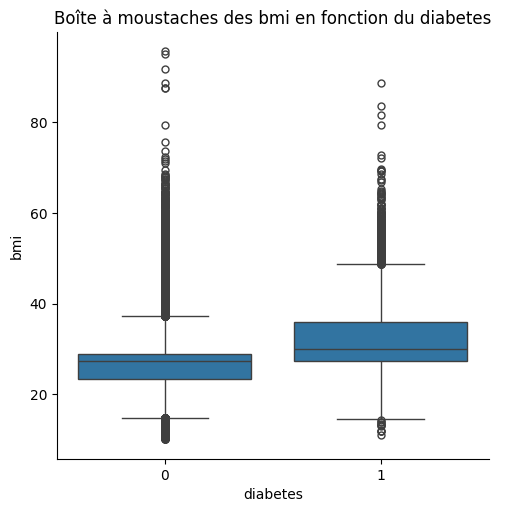

In [45]:
# Analyse des bmi
sns.catplot(x="diabetes", y="bmi", data=df, kind="box")
plt.title('Boîte à moustaches des bmi en fonction du diabetes')
plt.show()

##### 🧁 Visualisation par HbA1c_level

`Info générale`

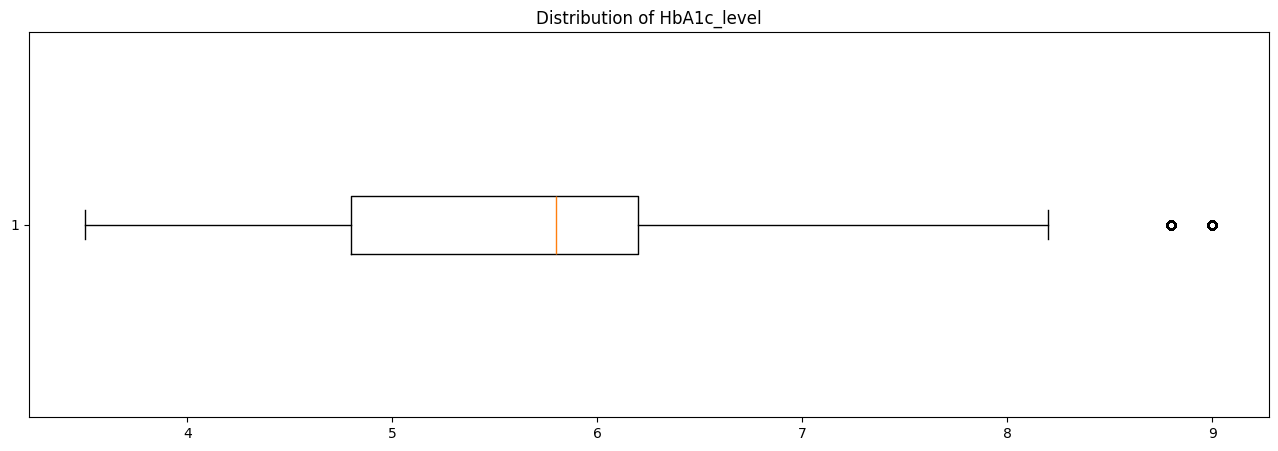

In [46]:
plt.figure(figsize=(16,5))
plt.boxplot(df['HbA1c_level'],vert=False)
plt.title("Distribution of HbA1c_level")
plt.show()

In [47]:
# Box Plot Vertical
#plt.boxplot(df['HbA1c_level'])
#plt.show()

`Info en lien avec le diabete`

In [48]:
# Nombre de valeurs pour "diabetes" par rapport à "HbA1c_level"
pd.crosstab(df.diabetes, df.HbA1c_level)

HbA1c_level,3.5,4.0,4.5,4.8,5.0,5.7,5.8,6.0,6.1,6.2,6.5,6.6,6.8,7.0,7.5,8.2,8.8,9.0
diabetes,,,,,,,,,,,,,,,,,,
0,7662,7542,7585,7597,7471,7709,7662,7648,7397,7621,7749,7857,0,0,0,0,0,0
1,0,0,0,0,0,704,659,647,651,648,613,683,642,634,643,661,661,654


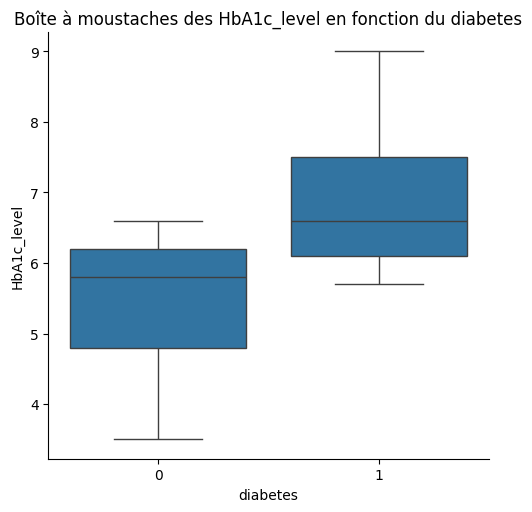

In [49]:
# Analyse des HbA1c_level
sns.catplot(x="diabetes", y="HbA1c_level", data=df, kind="box")
plt.title('Boîte à moustaches des HbA1c_level en fonction du diabetes')
plt.show()

##### 🍯 Visualisation par blood_glucose_level

`Info générale`

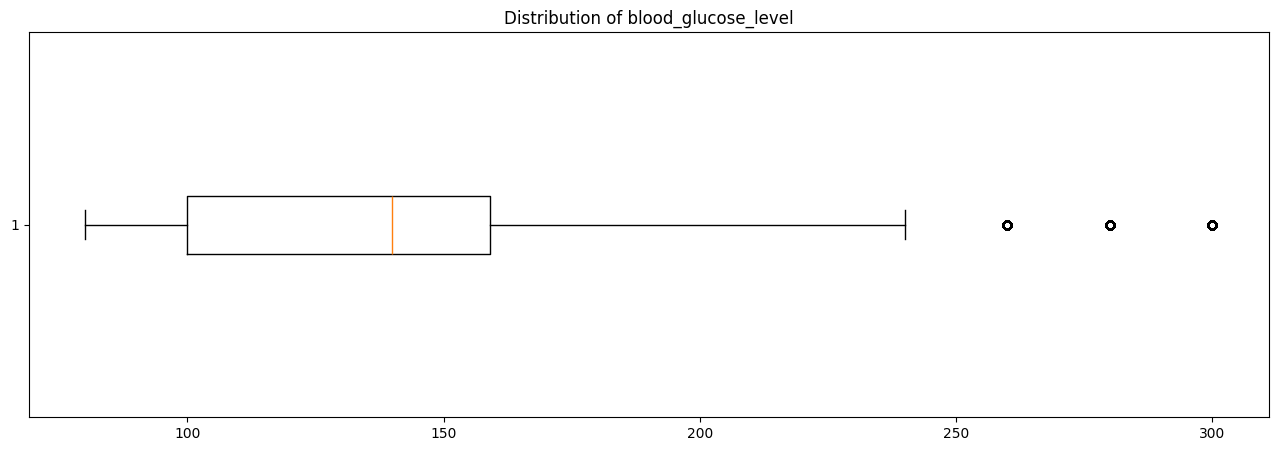

In [50]:
plt.figure(figsize=(16,5))
plt.boxplot(df['blood_glucose_level'],vert=False)
plt.title("Distribution of blood_glucose_level")
plt.show()

In [118]:
# Nombre de valeurs pour "diabetes" par rapport à "blood_glucose_level"
pd.crosstab(df.diabetes, df.blood_glucose_level)

blood_glucose_level,80,85,90,100,126,130,140,145,155,158,159,160,200,220,240,260,280,300
diabetes,,,,,,,,,,,,,,,,,,
0,7106,6901,7112,7025,7066,7102,7107,7017,6976,7026,7093,7016,6953,0,0,0,0,0
1,0,0,0,0,636,692,625,662,599,0,666,696,647,603,636,635,729,674


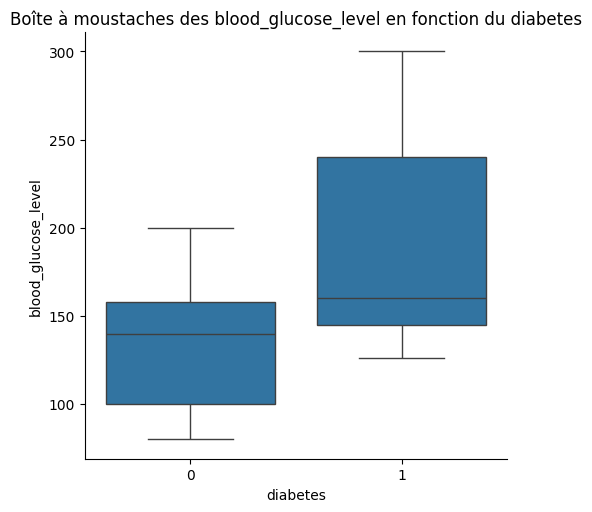

In [119]:
# Analyse des blood_glucose_level
sns.catplot(x="diabetes", y="blood_glucose_level", data=df, kind="box")
plt.title('Boîte à moustaches des blood_glucose_level en fonction du diabetes')
plt.show()

##### ☠ Visualisation par Diabetes

`Info générale`

In [51]:
# Nombre de valeurs pour "diabetes" par rapport à "diabetes"
pd.crosstab(df.diabetes, df.diabetes)

diabetes,0,1
diabetes,,
0,91500,0
1,0,8500


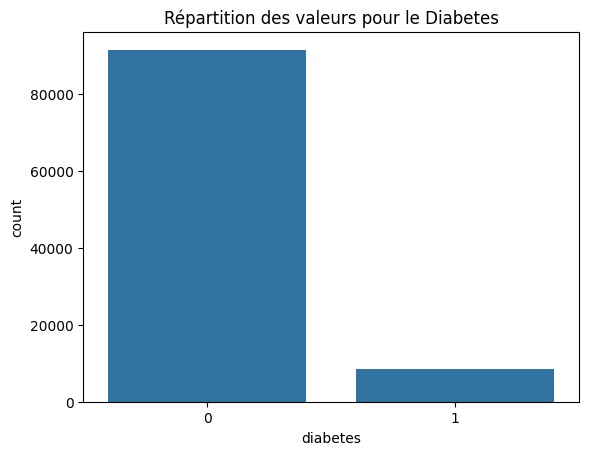

In [52]:
# Répartition des valeurs pour le Diabetes 
sns.countplot(x='diabetes', data=df)
plt.title('Répartition des valeurs pour le Diabetes')
plt.show()

## 🦾 MACHINE LEARNING
---

### 👾 PREPROCESSING

##### 💬 ENCODING

In [53]:
# Détail des éléments de la colonne 'gender'
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [54]:
# Détail des éléments de la colonne 'smoking_history'
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [55]:
# encodage des types object pour les éléments des colonnes 'gender' et 'smoking_history'
label_encoder = LabelEncoder()
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df['gender'] = label_encoder.fit_transform(df['gender'])

In [56]:
# Vérification de l'encodage
df['gender'].unique()

array([0, 1, 2])

In [57]:
# Vérification de l'encodage
df['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

In [58]:
# Transformation des éléments de la colonne 'age' en integer
df['age'] = df['age'].astype(int)

In [59]:
# Vérification de la transformation des éléments du Dataset en valeurs numériques
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 5.7 MB


##### 📏SEGMENTATION

In [60]:
# Segmentation du dataset
# Y pour la Target
y = df['diabetes']
# X pour les Features
X = df.drop(columns = ['diabetes'])

##### ⚖ RE-EQUILIBRAGE

🤖 SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) - FOR BALANCE IN OUTCOMES

In [61]:
# Traitement des datas pour un ré-équilbrage des valeurs de la colonne 'diabetes'
# Initial class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y).value_counts())

Class distribution before SMOTE:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Class distribution after SMOTE:
diabetes
0    91500
1    91500
Name: count, dtype: int64


### 🖥 MODELES DE MACHINE LEARNING 

#### 🌲 DECISION TREE CLASSIFIER

##### Création du modèle

In [62]:
# Création d'une instance du modèle de Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

In [63]:
# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Entraînement du modèle sur les données d'entraînement
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
# Prédictions sur les données de test
y_pred_tree = tree_model.predict(X_test)

##### Métriques

In [66]:
# Calcule des métriques d'évaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree) * 100
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

In [67]:
# Affichage des métriques
print("Métriques pour le modèle de Decision Tree Classifier :")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)

Métriques pour le modèle de Decision Tree Classifier :
Accuracy: 97.1256830601093
Precision: 0.9684530596731281
Recall: 0.9742721363412902
F1 Score: 0.9713538830192789


##### Confusion matrice

In [68]:
# Création d'une matrice de confusion
cm_tree = confusion_matrix(y_test, y_pred_tree)

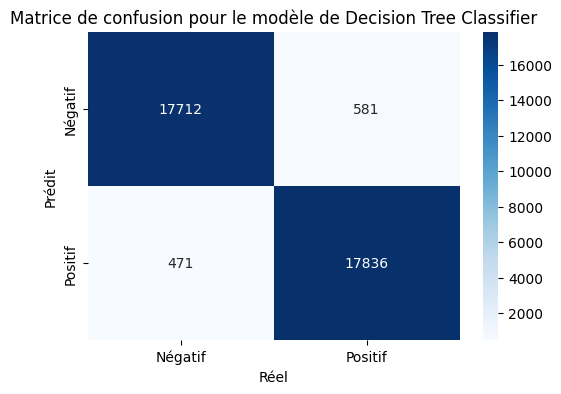

In [69]:
# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.title('Matrice de confusion pour le modèle de Decision Tree Classifier')
plt.show()

##### Features Importances

In [70]:
# Entraînement du modèle Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Obtention des importances des caractéristiques
feature_importances_tree = tree_model.feature_importances_

In [72]:
# Création d'un DataFrame pour stocker les importances des caractéristiques avec leurs noms
feature_importance_tree_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_tree
})

In [73]:
# Triage dees caractéristiques par importance décroissante
feature_importance_tree_df = feature_importance_tree_df.sort_values(by='Importance', ascending=False)

In [74]:
# Affichage des importances des caractéristiques
print("Importance des caractéristiques pour le modèle Decision Tree Classifier :")
print(feature_importance_tree_df)

Importance des caractéristiques pour le modèle Decision Tree Classifier :
               Feature  Importance
6          HbA1c_level    0.556257
7  blood_glucose_level    0.270813
1                  age    0.099114
5                  bmi    0.052201
4      smoking_history    0.012114
0               gender    0.004858
2         hypertension    0.002658
3        heart_disease    0.001985


C:\Users\patri\AppData\Local\Temp\ipykernel_10976\493751125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_df, palette='viridis')


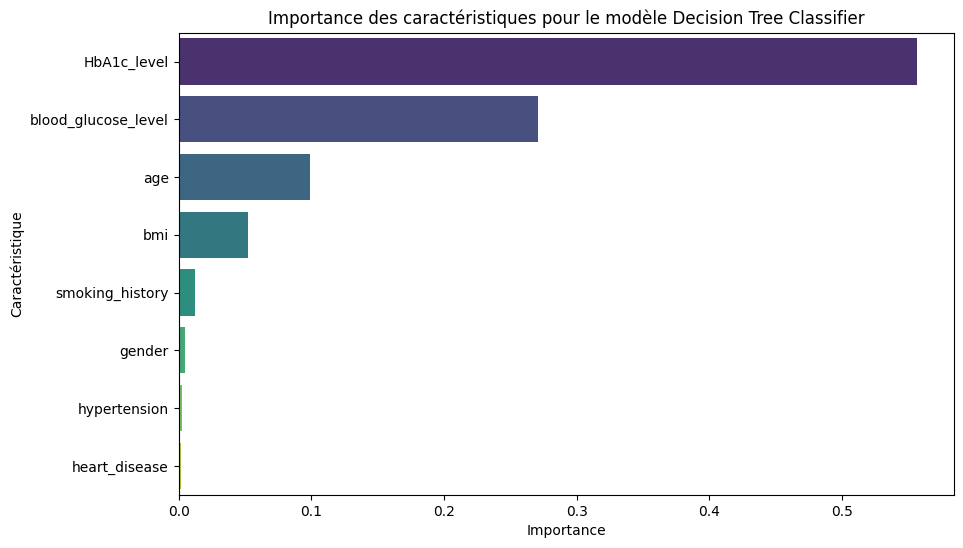

In [75]:
# Affichage d'un graphique des importances des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques pour le modèle Decision Tree Classifier')
plt.show()

#### 🍀 LOGISTIC REGRESSION

##### Création du modèle

In [76]:
# Création d'une instance du modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)

In [77]:
# Entraînement du modèle sur les données d'entraînement
logistic_model.fit(X_train, y_train)

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [78]:
# Prédictions sur les données de test
y_pred_logistic = logistic_model.predict(X_test)

In [79]:
# Calcule des métriques d'évaluation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

##### Métriques

In [80]:
# Affichage des métriques
print("Métriques pour le modèle de régression logistique :")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Métriques pour le modèle de régression logistique :
Accuracy: 88.50819672131148
Precision: 0.884957684957685
Recall: 0.8853444037799749
F1 Score: 0.8851510021298673


##### Confusion matrice

In [81]:
# Création d'une matrice de confusion
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

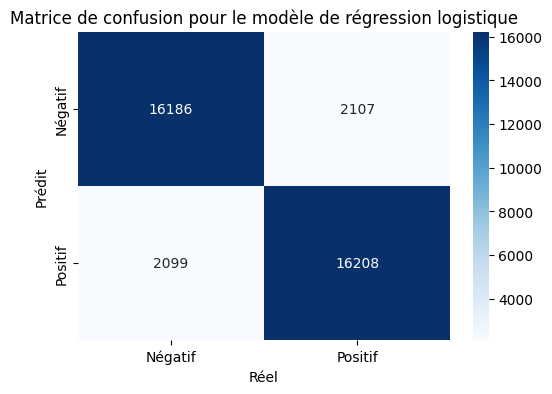

In [82]:
# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.title('Matrice de confusion pour le modèle de régression logistique')
plt.show()

##### Features Importances

In [83]:
# Entraînement du modèle Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [84]:
# Obtention des coefficients de régression
coefficients = logistic_model.coef_[0]

In [85]:
# Création d'un DataFrame pour stocker les coefficients avec les noms des caractéristiques
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

In [86]:
# Trie des caractéristiques par coefficient absolu décroissant
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

In [87]:
# Affichage des coefficients
print("Coefficients pour le modèle Logistic Regression :")
print(coefficients_df)

Coefficients pour le modèle Logistic Regression :
               Feature  Coefficient  Absolute Coefficient
6          HbA1c_level     2.426931              2.426931
0               gender    -0.462293              0.462293
2         hypertension    -0.375576              0.375576
3        heart_disease    -0.267719              0.267719
5                  bmi     0.103890              0.103890
1                  age     0.057383              0.057383
7  blood_glucose_level     0.030364              0.030364
4      smoking_history     0.003732              0.003732


C:\Users\patri\AppData\Local\Temp\ipykernel_10976\622233173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')


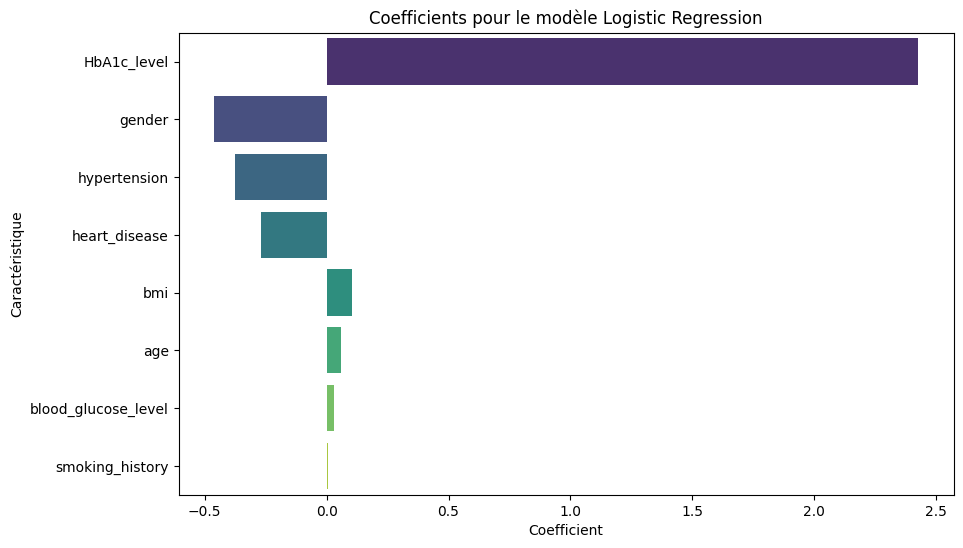

In [88]:
# Affichage d'un graphique des coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.title('Coefficients pour le modèle Logistic Regression')
plt.show()

#### 🌲🌲🌲RANDOM FOREST

##### Création du modèle

In [89]:
# Création d'une instance du modèle Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [90]:
# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Prédictions sur les données de test
y_pred_rf = rf_model.predict(X_test)

##### Métriques

In [92]:
# Calcule des métriques d'évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [93]:
# Affichage des métriques
print("Métriques pour le modèle Random Forest Classifier :")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Métriques pour le modèle Random Forest Classifier :
Accuracy: 97.34972677595628
Precision: 0.9734556775356382
Recall: 0.9735620254547441
F1 Score: 0.97350884859078


##### Confusion matrice

In [94]:
# Création d'une matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

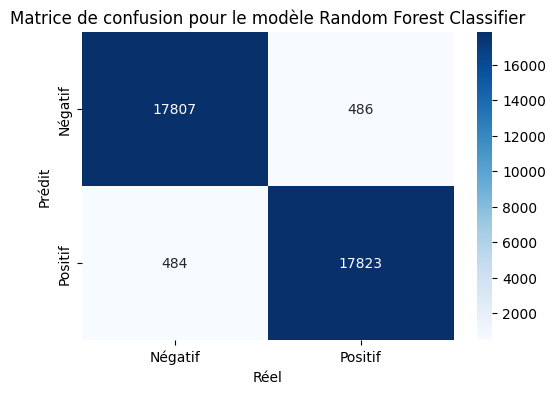

In [95]:
# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.title('Matrice de confusion pour le modèle Random Forest Classifier')
plt.show()

##### Features Importances

In [96]:
# Entraînement du modèle RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Obtention des importances des caractéristiques
feature_importances = rf_model.feature_importances_

In [98]:
# Création d'un DataFrame pour stocker les importances des caractéristiques avec leurs noms
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [99]:
# Trie des caractéristiques par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [100]:
# Affichage des importances des caractéristiques
print("Importance des caractéristiques :")
print(feature_importance_df)

Importance des caractéristiques :
               Feature  Importance
6          HbA1c_level    0.409117
7  blood_glucose_level    0.259900
1                  age    0.172228
5                  bmi    0.114798
4      smoking_history    0.030323
0               gender    0.008097
2         hypertension    0.003327
3        heart_disease    0.002211


C:\Users\patri\AppData\Local\Temp\ipykernel_10976\3758663456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


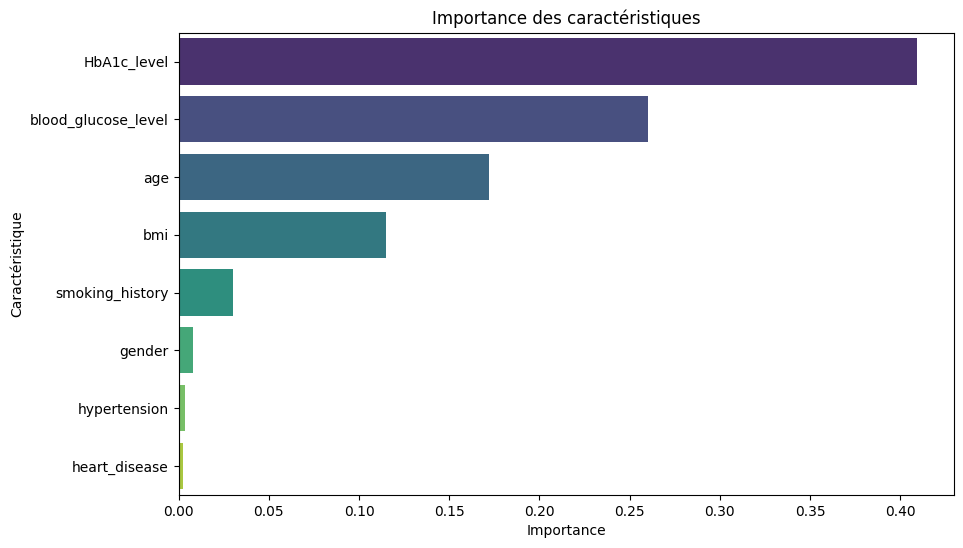

In [101]:
# Affichage d'un graphique des importances des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques')
plt.show()


#### 🤖 GRADIAN BOOST CLASSIFIER

##### Création du modèle

In [102]:
# Création d'une instance du modèle Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

In [103]:
# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [105]:
# Prédictions sur les données de test
y_pred_gb = gb_model.predict(X_test)

##### Métriques

In [106]:
# Calcule des métriques d'évaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [107]:
# Affichage des métriques
print("Métriques pour le modèle Gradient Boosting Classifier :")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

Métriques pour le modèle Gradient Boosting Classifier :
Accuracy: 96.55191256830601
Precision: 0.984150428904164
Recall: 0.9463046921942426
F1 Score: 0.9648565859092175


##### Confusion matrice

In [108]:
# Création d'une matrice de confusion
cm_gb = confusion_matrix(y_test, y_pred_gb)

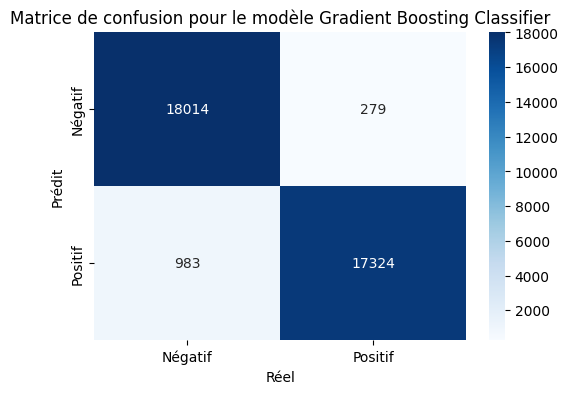

In [109]:
# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.title('Matrice de confusion pour le modèle Gradient Boosting Classifier')
plt.show()

##### Features Importances

In [110]:
# Entraînement du modèle Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [111]:
# Obtention des importances des caractéristiques
feature_importances_gb = gb_model.feature_importances_

In [112]:
# Création d'un DataFrame pour stocker les importances des caractéristiques avec leurs noms
feature_importance_gb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_gb
})

In [113]:
# Trie les caractéristiques par importance décroissante
feature_importance_gb_df = feature_importance_gb_df.sort_values(by='Importance', ascending=False)

In [114]:
# Affichage des importances des caractéristiques
print("Importance des caractéristiques pour le modèle Gradient Boosting Classifier :")
print(feature_importance_gb_df)

Importance des caractéristiques pour le modèle Gradient Boosting Classifier :
               Feature  Importance
6          HbA1c_level    0.583551
7  blood_glucose_level    0.296853
1                  age    0.095800
5                  bmi    0.021254
4      smoking_history    0.002052
0               gender    0.000487
2         hypertension    0.000002
3        heart_disease    0.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_10976\2745358295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_gb_df, palette='viridis')


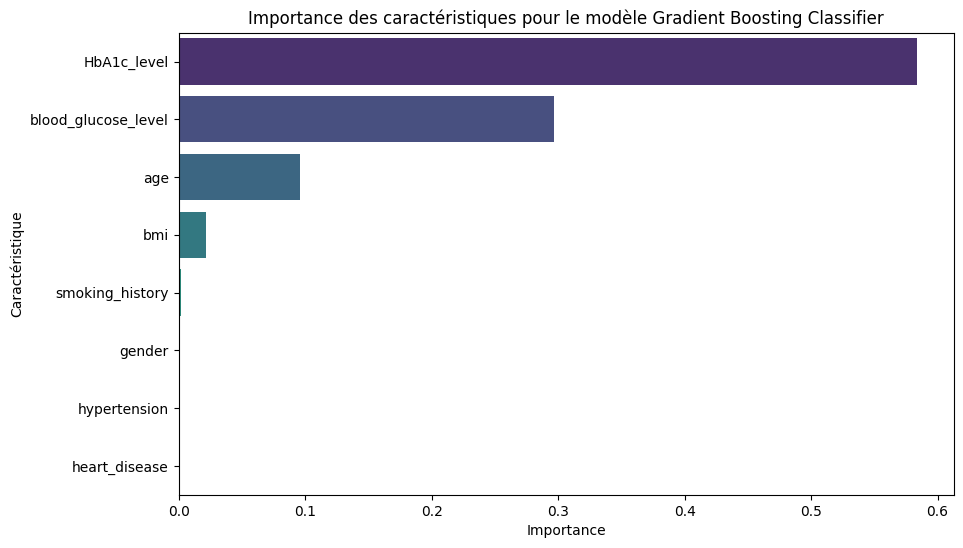

In [115]:
# Affichage d'un graphique des importances des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques pour le modèle Gradient Boosting Classifier')
plt.show()

### 📚 RESUME

In [116]:
# Création d'un DataFrame pour stocker les résultats des métriques
summary_df = pd.DataFrame({
    'Modèle': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_tree, accuracy_logistic, accuracy_rf, accuracy_gb],
    'Precision': [precision_tree, precision_logistic, precision_rf, precision_gb],
    'Recall': [recall_tree, recall_logistic, recall_rf, recall_gb],
    'F1 Score': [f1_tree, f1_logistic, f1_rf, f1_gb]
})

In [117]:
# Affichage du résumé des résultats
print("Résumé des résultats des métriques :")
print(summary_df)

Résumé des résultats des métriques :
                Modèle   Accuracy  Precision    Recall  F1 Score
0        Decision Tree  97.125683   0.968453  0.974272  0.971354
1  Logistic Regression  88.508197   0.884958  0.885344  0.885151
2        Random Forest  97.349727   0.973456  0.973562  0.973509
3    Gradient Boosting  96.551913   0.984150  0.946305  0.964857
